**Step 1: Upload Your CSV File**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 2015_avengers_age_of_ultron_critic.csv to 2015_avengers_age_of_ultron_critic.csv


** Step 2: Load and Inspect the Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("2015_avengers_age_of_ultron_critic.csv")
df.head()


,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,reviewId,originalScore,scoreSentiment
0,2015-04-19,Matthew Pejkovic,/critics/matthew-pejkovic,fresh,True,False,False,False,/critics/source/510,Matt's Movie Reviews,http://www.mattsmoviereviews.net/movie-critic-...,The stakes on the line in this action adventur...,2257512,4/5,POSITIVE
1,2015-04-21,Alonso Duralde,/critics/alonso-duralde,fresh,True,False,False,True,/critics/source/2205,TheWrap,http://www.thewrap.com/avengers-age-of-ultron-...,Marvel movie die-hards will come away having f...,2257752,NaN,POSITIVE
2,2015-04-21,Eric Kohn,/critics/eric-kohn,rotten,False,True,False,True,/critics/source/226,indieWire,http://www.indiewire.com/article/review-avenge...,"It looks great, but haven't we been here before?",2257753,C+,NEGATIVE
3,2015-04-21,Scott Mendelson,/critics/scott-mendelson,rotten,False,True,False,False,/critics/source/2233,Forbes,http://www.forbes.com/sites/scottmendelson/201...,Avengers: Age of Ultron plays like an obligati...,2257754,4.0/10,NEGATIVE
4,2015-04-21,Drew McWeeny,/critics/drew-mcweeny,fresh,True,False,False,False,/critics/source/2137,HitFix,http://www.hitfix.com/motion-captured/review-a...,"In the moments where it all comes together, li...",2257755,B+,POSITIVE


** Step 3: Preprocess the Text (Lowercase, Remove Punctuation, Stopwords)**

In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['cleaned_quote'] = df['quote'].apply(preprocess)
df[['quote', 'cleaned_quote']].head()


,quote,cleaned_quote
0,The stakes on the line in this action adventur...,stakes line action adventure skyhigh souldeep ...
1,Marvel movie die-hards will come away having f...,marvel movie diehards come away having nuggets...
2,"It looks great, but haven't we been here before?",looks great havent
3,Avengers: Age of Ultron plays like an obligati...,avengers age ultron plays like obligation box ...
4,"In the moments where it all comes together, li...",moments comes like suretobeiconic hulkbuster s...


**Step 4: Convert Text to TF-IDF Vectors**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_quote'])
y = df['scoreSentiment']


**Step 5: Train/Test Split and Naive Bayes Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

**Step 6: Make Predictions and Show Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 73.68%


**Step 7: Display Confusion Matrix**

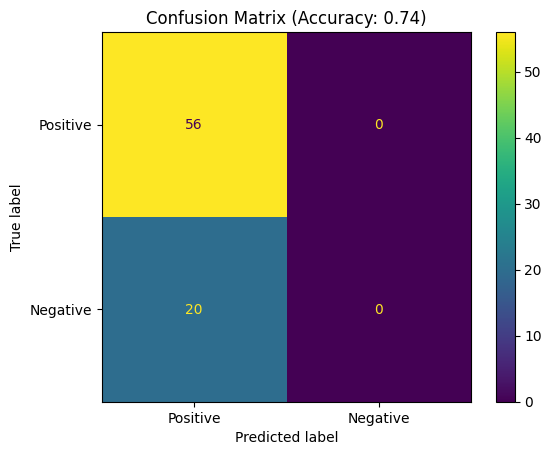

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["POSITIVE", "NEGATIVE"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot()
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()


**OPTION A: Traditional ML (TF-IDF + Naive Bayes)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_quote'])
y = df['scoreSentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

Naive Bayes Accuracy: 0.7368421052631579


**OPTION B: Deep Learning (GloVe + Neural Net)**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

df['label'] = df['scoreSentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_quote'])

sequences = tokenizer.texts_to_sequences(df['cleaned_quote'])
padded = pad_sequences(sequences, maxlen=100, padding='post')

X = padded
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Section 4B: Load GloVe and Create Embedding Matrix

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_matrix = np.zeros((10000, 100))
word_index = tokenizer.word_index
for word, i in word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


--2025-05-02 03:06:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-02 03:06:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-02 03:06:01--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov